<a href="https://colab.research.google.com/github/ghousiya47/Project-1/blob/main/restaurant_reviews_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#step 1: import model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import math
warnings.filterwarnings('ignore')

In [3]:
#step 2: load datasets
df = pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv", delimiter='\t', quoting=3)


In [4]:
#prints out first 5 row of df
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.head().T
#changes configuration of table

,0,1,2,3,4
Review,Wow... Loved this place.,Crust is not good.,Not tasty and the texture was just nasty.,Stopped by during the late May bank holiday of...,The selection on the menu was great and so wer...
Liked,1,0,0,1,1


In [10]:
df.shape
#decribes the dimension of dataframe

(1000, 2)

In [8]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
df['Liked'].value_counts()


1    500
0    500
Name: Liked, dtype: int64

In [12]:
df['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [13]:
df['length']=df['Review'].apply(len)
#creating a new column called 'length' which gives length of each review

In [14]:
df.head()


,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [15]:
df.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [20]:
#lets see what's the review with maximum characters i.e 149 which we got from above
df[df['length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [22]:
#step 3:clean data by removing punctuations and stopwords
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#lets print list of all stopwords of english language
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
#you can try with some other languages like french and german
stopwords.words('german')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [30]:
#lets print all punctuations
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [31]:
#lets create a new function which removes punctuation n stopwords
def text_process(msg):
  nopunc = [char for char in msg if char not in string.punctuation] #keep only thoose characters which are not punctuation
  nopunc = ''.join(nopunc)    #converts characters back to word
  return ''.join(word for word in nopunc.split() if word.lower() not in stopwords.words('english'))   #keep only those words which are not stopwords

In [33]:
#lets create a new column which is review part without ctopwords and punctuation
df['new_review']=df['Review'].apply(text_process)

In [34]:
df.head()

,Review,Liked,length,new_review
0,Wow... Loved this place.,1,24,WowLovedplace
1,Crust is not good.,0,18,Crustgood
2,Not tasty and the texture was just nasty.,0,41,tastytexturenasty
3,Stopped by during the late May bank holiday of...,1,87,StoppedlateMaybankholidayRickSteverecommendati...
4,The selection on the menu was great and so wer...,1,59,selectionmenugreatprices


In [35]:
#generate word cloud
from wordcloud import WordCloud


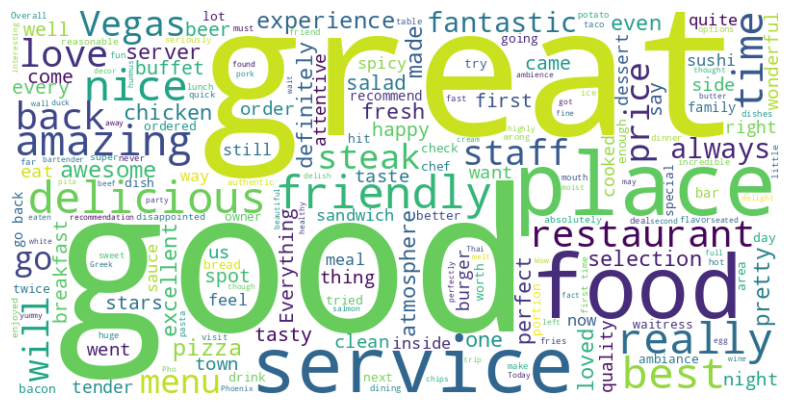

In [39]:
#positive comment wordcloud
word_cloud=df.loc[df['Liked']==1,:] #create wordcloud for only positive comments
text = ''.join([text for text in word_cloud['Review']])
wrdcld = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wrdcld, interpolation = 'bilinear')
plt.axis('off')
plt.show()


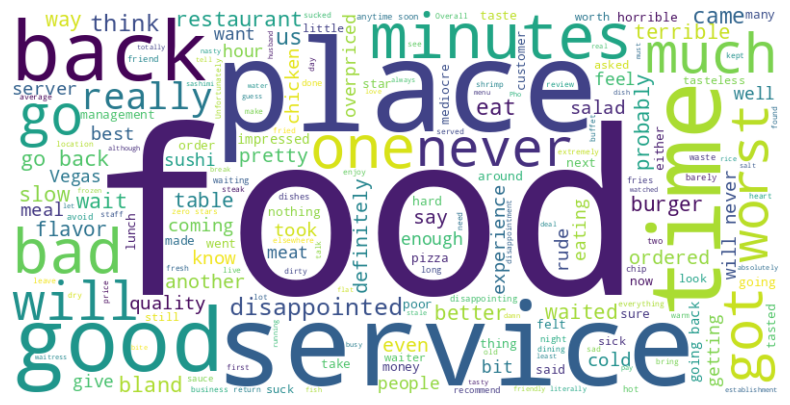

In [40]:
#negative reviews
word_cloud=df.loc[df['Liked']==0,:] #create wordcloud for only positive comments
text = ''.join([text for text in word_cloud['Review']])
wrdcld = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wrdcld, interpolation = 'bilinear')
plt.axis('off')
plt.show()